In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./galaxies.csv')
points = df.values

In [42]:
df

,X,Y
0,6.649504,2.223293
1,5.260232,-7.556045
2,6.164551,9.245618
3,5.033345,9.002009
4,3.674350,-7.836118
...,...,...
995,4.963106,-7.547204
996,6.147833,-8.742696
997,4.722672,9.892131
998,6.333305,2.750708


In [5]:
model = KMeans(n_clusters=3)

In [7]:
model.fit(points)
labels = model.predict(points)

In [79]:
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in range(labels.shape[0]):
        if labels[i] == 0:
            data_0.append(points[i]) 
        elif labels[i] == 1:
            data_1.append(points[i]) 
        else:
            data_2.append(points[i]) 
    # YOUR CODE HERE
    return np.array(data_0),np.array(data_1),np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)


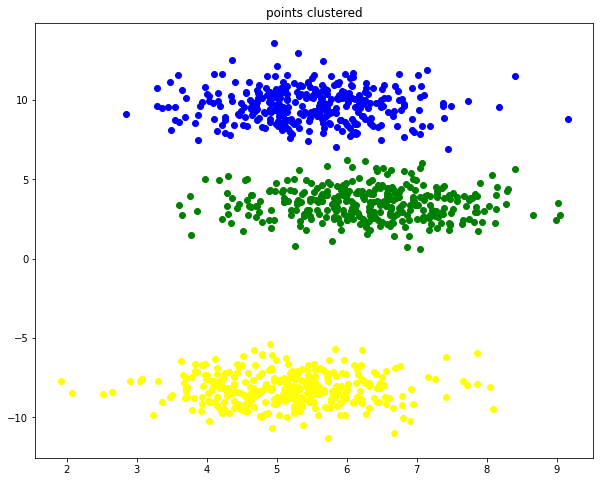

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(data_0[:,0],data_0[:,1], color ='yellow')
plt.scatter(data_1[:,0],data_1[:,1], color ='blue')
plt.scatter(data_2[:,0],data_2[:,1], color ='green')
plt.title('points clustered')
plt.show()

In [89]:
centroids = model.cluster_centers_
centroids
centroids_max_index = np.argmax(centroids,axis=0)
print('Max values index for x & y is:',centroids_max_index)
uppermost_galaxy_index = centroids_max_index[1]
print(uppermost_galaxy_index) 
uppermost_centroids = centroids[uppermost_galaxy_index]
print('Uppermost Galaxy has the centroid coordinates:',uppermost_centroids)
galaxy_list= [data_0,data_1,data_2]
uppermost_galaxy = galaxy_list[uppermost_galaxy_index]

Max values index for x & y is: [2 1]
1
Uppermost Galaxy has the centroid coordinates: [5.46605246 9.68163004]


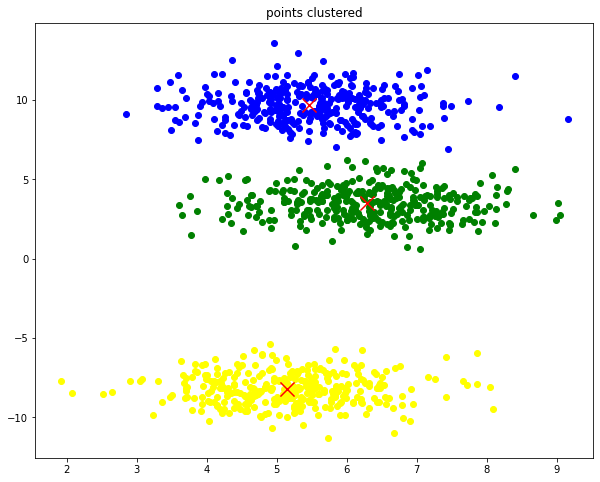

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(data_0[:,0],data_0[:,1], color ='yellow')
plt.scatter(data_1[:,0],data_1[:,1], color ='blue')
plt.scatter(data_2[:,0],data_2[:,1], color ='green')
plt.scatter(centroids_x,centroids_y,marker='x',s=200,c='r')
plt.title('points clustered')
plt.show()

In [64]:
new_galaxy = data_1
new_centroids = centroids[uppermost_galaxy_index]
new_centroids_x = new_centroids[0]
new_centroids_y = new_centroids[1]

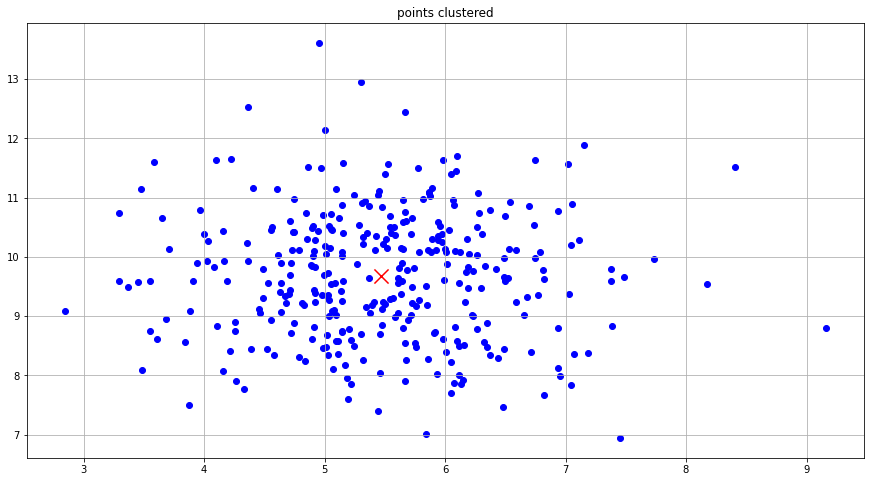

In [67]:
fig, ax = plt.subplots(figsize=(15,8))

plt.scatter(new_galaxy[:,0],new_galaxy[:,1], color ='blue')
plt.scatter(new_centroids_x,new_centroids_y,marker='x',s=200,c='r')
plt.title('points clustered')
plt.grid()
plt.show()

In [43]:
planets_x = new_galaxy[0]
planets_Y = new_galaxy[1]

In [72]:
max_planets_x_y_index = np.argmax(new_galaxy,axis=0)
print('Index for Max values in x & y:',max_planets_x_y_index)
max_x_value = new_galaxy[62]
print('Planet rightmost ',max_x_value)

Index for Max values in x & y: [62 94]
Planet rightmost  [9.16085726 8.80725863]


In [66]:
new_galaxy[62]

array([9.16085726, 8.80725863])

In [63]:
planets_x_max = max(new_galaxy[0])
planets_x_max

9.24561800014239